
## **0. Загрузка датасета  по курсам**

---




### 1. Изучить датасет – оцените его размер

In [ ]:
import pandas as pd
df = pd.read_csv('courses-program.csv') 
df.shape

(424, 4)

### 2. Привести к нормальному виду столбцы, сделать численные столбцы

#### Столбцы название курса и название провайдера

In [ ]:
df['title'][329].replace('\xa0', ' ').split(' от')[0]

'Курс «Разработчик Node.js»'

In [ ]:
df['title_course']=df['title'].apply(lambda x: x.replace('\xa0', ' ').split(' от')[0])
df['title_course']

0                 Профессия «С#-разработчик»
1      Профессия «Разработчик на C++ с нуля»
2             Факультет fullstack JavaScript
3                 Профессия «Data scientist»
4        Профессия «Системный администратор»
                       ...                  
419                   Курс «DevOps marathon»
420                         Курс «PHP/MySQL»
421        Курс «Python для непрограммистов»
422                       Курс «Bootstrap 3»
423                        Курс «Основы SQL»
Name: title_course, Length: 424, dtype: object

In [ ]:
df['title_provider']=df['title'].apply(lambda x: x.replace('\xa0', ' ').split(' от')[1])
df['title_provider']

0           Skillbox
1           Skillbox
2         GeekBrains
3       SkillFactory
4          Нетологии
           ...      
419             OTUS
420        FructCode
421     SkillFactory
422        FructCode
423            Udemy
Name: title_provider, Length: 424, dtype: object

In [ ]:
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Geekbrains', 'GeekBrains'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Нетологии', 'Нетология'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Fructcode', 'FructCode'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('otus', 'OTUS'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Otus', 'OTUS'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Skillfactory', 'SkillFactory'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('SkillFactory и МФТИ', 'SkillFactory'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('SkillFactory и УрФУ', 'SkillFactory'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Loftschool', 'LoftSchool'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Skillbox и РАНХиГС', 'Skillbox'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Яндекс Практикума', 'Яндекс Практикум'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('GeekBrains при участии Skillbox', 'GeekBrains'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Нетологияи и НИУ ВШЭ', 'Нетология'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Специалист.ру', 'Cпециалист.ру'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace('Productstar', 'ProductStar'))
df['title_provider']=df['title_provider'].apply(lambda x: x.replace(' ', ''))

#### Столбец длительность обучения в мес

In [ ]:
import re

def clear_duration(duration):
  return int(re.sub('\D', '', duration))
df['duration'] = df['duration'].apply(clear_duration)

#### Столбец стоимость без учета скидки, общая

In [ ]:
df['price'][0].split('₽')[1].replace(' ', '').replace('\xa0', '')

'125063'

In [ ]:
df['price_total']=df['price'].apply(lambda x: x.replace(' ', '').replace('\xa0', ''))
df['price_total']=df['price_total'].str.split('₽').str[0].replace('Бесплатно','0')
df['price_total']=df['price_total'].astype('float')
df['price_total']

0      166750.0
1      193833.0
2      224500.0
3      324000.0
4      130000.0
         ...   
419      3000.0
420       570.0
421         0.0
422      2100.0
423      1790.0
Name: price_total, Length: 424, dtype: float64

#### Стоимость с учетом скидки

In [ ]:
df['price_discount']=df['price'].apply(lambda x: x.replace(' ', '').replace('\xa0', ''))
df['price_discount']=df['price_discount'].str.split('₽').str[1].replace('', 'NaN')
df['price_discount']=df['price_discount'].astype('float')
df['price_discount']


0      125063.0
1      125991.0
2      168750.0
3      178200.0
4       78000.0
         ...   
419         NaN
420         NaN
421         NaN
422       890.0
423         NaN
Name: price_discount, Length: 424, dtype: float64

In [ ]:
df.price_discount = df.price_discount.fillna(df.price_total)
df.price_discount 

0      125063.0
1      125991.0
2      168750.0
3      178200.0
4       78000.0
         ...   
419      3000.0
420       570.0
421         0.0
422       890.0
423      1790.0
Name: price_discount, Length: 424, dtype: float64

In [ ]:
df.price_discount.isna().sum()

0

#### Создаем новый датасет с редактированными столбцами

In [ ]:
dfcourse=df.copy()
dfcourse = df.drop(['title', 'price'], axis=1)
dfcourse

,duration,rating,title_course,title_provider,price_total,price_discount
0,12,10.0,Профессия «С#-разработчик»,Skillbox,166750.0,125063.0
1,18,10.0,Профессия «Разработчик на C++ с нуля»,Skillbox,193833.0,125991.0
2,15,10.0,Факультет fullstack JavaScript,GeekBrains,224500.0,168750.0
3,24,10.0,Профессия «Data scientist»,SkillFactory,324000.0,178200.0
4,12,10.0,Профессия «Системный администратор»,Нетология,130000.0,78000.0
...,...,...,...,...,...,...
419,1,4.3,Курс «DevOps marathon»,OTUS,3000.0,3000.0
420,1,4.3,Курс «PHP/MySQL»,FructCode,570.0,570.0
421,1,4.0,Курс «Python для непрограммистов»,SkillFactory,0.0,0.0
422,1,3.8,Курс «Bootstrap 3»,FructCode,2100.0,890.0


#### Проверка итогового датасет на пропуски. 
пропусков нет

In [ ]:
missing_values = ((dfcourse.isna().sum() / len(dfcourse)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


duration          0.0
rating            0.0
title_course      0.0
title_provider    0.0
price_total       0.0
price_discount    0.0
dtype: float64

### OHE Категориальных

In [ ]:
provaiders = ['Skillbox', 'GeekBrains', 'SkillFactory', 'Нетология']
filter = dfcourse['title_provider'].isin(provaiders)
dfcoursOHE = dfcourse[filter]
dfcoursOHE.shape
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
dfcoursOHE.title_provider.unique()
dfcoursOHE.shape

(278, 6)

In [ ]:
ohe.fit(dfcoursOHE[['title_provider']])

OneHotEncoder(sparse=False)

In [ ]:
ohe_shedule = ohe.transform(dfcoursOHE[['title_provider']])
ohe_shedule

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
ohe.get_feature_names()
dfcoursOHE[ohe.get_feature_names()] = ohe_shedule

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


#### Переименовать датасет в dfcourse

In [ ]:
dfcourse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            424 non-null    int64  
 1   rating              424 non-null    float64
 2   title_course        424 non-null    object 
 3   title_provider      424 non-null    object 
 4   price_total         424 non-null    float64
 5   price_discount      424 non-null    float64
 6   x0_CodeStar         424 non-null    float64
 7   x0_Cпециалист.ру    424 non-null    float64
 8   x0_FructCode        424 non-null    float64
 9   x0_GeekBrains       424 non-null    float64
 10  x0_HEDU             424 non-null    float64
 11  x0_Hedu             424 non-null    float64
 12  x0_LoftSchool       424 non-null    float64
 13  x0_MDA              424 non-null    float64
 14  x0_NordicIT         424 non-null    float64
 15  x0_OTUS             424 non-null    float64
 16  x0_Produ

### Выгрузка df для BI

In [ ]:
dfcourse.to_csv('dfcourseBI.csv', index=False)

## **0. Загрузка датасет по вакансиям Мск / Спб**

---






In [ ]:
import pandas as pd
df = pd.read_csv('FIN-jobs.csv') 
df.shape

(7758, 15)

In [ ]:
df.duplicated()
df[df.duplicated()].shape
df2 = df.drop_duplicates()
df2[df2.duplicated()].shape

(0, 15)

In [ ]:
df2 = df2.drop(columns=['type'])
df2.shape

(7573, 14)

1.1 привести в вид датасет, удалить лишние символы

In [ ]:
df2['schedule_new'] = df2['schedule_new'].apply(lambda x: x.replace("'", "").replace("}", ""))
df2['Responsibility'] = df2['Responsibility'].apply(lambda x: x.replace("'", ""))
df2['Requirment'] = df2['Requirment'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2['currency'] = df2['currency'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
#df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace("'", "").replace(" ", ""))
df2['vacancy_type'] = df2['vacancy_type'].apply(lambda x: x.replace("'", "").replace("}", ""))
df2['area-city'] = df2['area-city'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2['address_new'] = df2['address_new'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2.head(2)

,id,name,published_at,created_at,area-city,salaryfrom,salaryto,currency,vacancy_type,address_new,employer_new,Responsibility,Requirment,schedule_new
0,66729857,Аналитик,2022-06-09T11:33:57+0300,2022-06-09T11:33:57+0300,Москва,130000.0,180000.0,RUR,Открытая,,'ShinSale',Опыт написания постановок и технической докум...,Взаимодействовать с командой разработчиков по...,Полный день
1,66080005,Аналитик,2022-06-06T13:42:40+0300,2022-06-06T13:42:40+0300,Москва,200000.0,0.0,RUR,Открытая,Энергетическая улица,'Научный Центр Автоматизированных систем упра...,Высшее образование. Опыт работы в ИТ Интеграт...,Участие в проектах по автоматизации процессов...,Полный день


In [ ]:
missing_values = ((df2.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                 0.000000
name               0.000000
published_at       0.000000
created_at         0.000000
area-city          0.000000
currency           0.000000
vacancy_type       0.000000
address_new        0.000000
Responsibility     0.000000
Requirment         0.000000
schedule_new       0.000000
employer_new       0.219129
salaryfrom        71.049239
salaryto          71.049239
dtype: float64

### Выгрузка df для BI

In [ ]:
dfspb_msk=df2.copy()
dfspb_msk.to_csv('dfspb_mskBI.csv', index=False)

## **0. Загрузка датасет, по вакансиям РФ/зарубеж**

---



In [ ]:
import pandas as pd
df = pd.read_csv('FIN-jobs-SALARY.csv') 
df.shape

(9823, 14)

In [ ]:
df.duplicated()
df[df.duplicated()].shape
df2 = df.drop_duplicates()
df2 = df2.drop(columns=['has_test'])
df2.shape

(9818, 13)

### удалить пробелы и пр.

In [ ]:
df2

,id,name,published_at,created_at,area-city,salaryfrom,salaryto,currency,vacancy_type,employer_new,Responsibility,Requirment,schedule_new
0,67462579,Data Engineer,2022-07-04T14:54:36+0300,2022-07-04T14:54:36+0300,Санкт-Петербург,3500.0,5700.0,'EUR','Открытая'},'Plesk','Опыт работы с PySpark/EMR. Опыт в написании ...,NaN,'Удаленная работа'}
1,67465784,Data Scientist ML Engineer (WFH),2022-07-04T15:50:30+0300,2022-07-04T15:50:30+0300,Санкт-Петербург,2000.0,5000.0,'USD','Открытая'},'Thirdeye Incorporation',"""Bachelor's Degree in Information Technology ...",NaN,'Полный день'}
2,67366124,Senior Data Scientist,2022-07-04T14:22:08+0300,2022-07-04T14:22:08+0300,Санкт-Петербург,5200.0,5200.0,'USD','Открытая'},'КСК-Эйч Ар','Высшее образование в области компьютерных на...,Python,'Полный день'}
3,67080509,Senior Data Engineer,2022-07-04T14:22:16+0300,2022-07-04T14:22:16+0300,Санкт-Петербург,4500.0,6000.0,'USD','Открытая'},'КСК-Эйч Ар',"'...Science, <highlighttext>Data</highlightte...",Commercial experience in <highlighttext>data<...,'Полный день'}
4,67464969,Frontend-разработчик,2022-07-04T15:37:36+0300,2022-07-04T15:37:36+0300,Санкт-Петербург,80000.0,120000.0,'RUR','Открытая'},'ГК АВТОграф',"'Отличные знания HTML5, CSS3, SASS. Современн...",NaN,'Полный день'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,66796007,SAP разработчик (стажер),2022-07-04T21:51:03+0300,2022-07-04T21:51:03+0300,Чебоксары,18000.0,25000.0,'RUR','Открытая'},'Интем Лаб',"'Профильная специальность (программирование, ...",NaN,'Полный день'}
9819,66229671,Программист 1С,2022-07-04T13:08:21+0300,2022-07-04T13:08:21+0300,Киров (Кировская область),140000.0,NaN,'RUR','Открытая'},'Первый Бит','...С,ERP» на уровне <highlighttext>разработчика</hi...,'Полный день'}
9820,66700102,"Инженер-программист, разработчик Unity",2022-07-04T13:28:13+0300,2022-07-04T13:28:13+0300,Солигорск,1300.0,NaN,'BYR','Открытая'},'КонстантаТайм','Преподавать программирование и робототехнику...,NaN,'Полный день'}
9821,66546741,Аналитик коммерческого отдела,2022-07-02T15:41:35+0300,2022-07-02T15:41:35+0300,Ярославль,40000.0,50000.0,'RUR','Открытая'},'ДУГАЛАК','Преимуществом будет являться образование по ...,NaN,'Полный день'}


In [ ]:
#df2['schedule_new'] = df2['schedule_new'].apply(lambda x: x.replace("'", "").replace("}", ""))
df2['Responsibility'] = df2['Responsibility'].apply(lambda x: x.replace("'", ""))
df2['Requirment'] = df2['Requirment'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2['currency'] = df2['currency'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2['currency'] = df2['currency'].apply(lambda x: x.replace(" ", ""))
df2['currency'] = df2['currency'].apply(lambda x: x.replace(" ", ""))
df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace("'", "") if not pd.isna(x) else '')
df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace(" ", ""))
df2['vacancy_type'] = df2['vacancy_type'].apply(lambda x: x.replace("'", "").replace("}", ""))
df2['area-city'] = df2['area-city'].apply(lambda x: x.replace(" ", ""))
df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace("Profilance Group (ИП Страмоусов Марк Петрович)", "Profilance Group"))
df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace("ProfilanceGroup", "ProfilanceGroup"))
df2['employer_new'] = df2['employer_new'].apply(lambda x: x.replace("СпециальныйТехнологическийЦентр(ОООСТЦ)", "СТЦ"))
df2['schedule_new'] = df2['schedule_new'].apply(lambda x: x.replace("'", ""))
df2['schedule_new'] = df2['schedule_new'].apply(lambda x: x.replace("}", ""))
df2.shape

(9818, 13)

### удалить ненужные вакансии, не относящиеся к IT

In [ ]:
mask = df2['name'].str.contains('Фармацевт')
idx = df2.index[mask]
df2 = df2.drop(idx,axis=0)
df2.shape

NameError: ignored

In [ ]:
mask2 = df2['name'].str.contains(' ресторан')
idx2 = df2.index[mask2]
df2 = df2.drop(idx2,axis=0)
df2.shape

(9742, 13)

In [ ]:
mask3 = df2['name'].str.contains('Кладовщик')
idx3 = df2.index[mask3]
df2 = df2.drop(idx3,axis=0)
df2.shape

(9736, 13)

In [ ]:
mask4 = df2['name'].str.contains('Фасовщик')
idx4 = df2.index[mask4]
df2 = df2.drop(idx4,axis=0)
df2.shape

(9727, 13)

In [ ]:
mask5 = df2['name'].str.contains(' курьер')
idx5 = df2.index[mask5]
df2 = df2.drop(idx5,axis=0)
df2.shape

(9718, 13)

In [ ]:
mask6 = df2['name'].str.contains('Медицинский')
idx6 = df2.index[mask6]
df2 = df2.drop(idx6,axis=0)
df2.shape

(9716, 13)

In [ ]:
mask7 = df2['name'].str.contains('поиску коммерческой недвижимост')
idx7 = df2.index[mask7]
df2 = df2.drop(idx7,axis=0)
df2.shape

(9707, 13)

In [ ]:
mask8 = df2['employer_new'].str.contains('Job development')
idx8 = df2.index[mask8]
df2 = df2.drop(idx8,axis=0)
df2.shape

(9707, 13)

In [ ]:
mask9 = df2['employer_new'].str.contains('HRDevelopment')
idx9 = df2.index[mask9]
df2 = df2.drop(idx9,axis=0)
df2.shape

(9678, 13)

In [ ]:
mask10 = df2['employer_new'].str.contains('ТАТТЕЛЕКОМ')
idx10 = df2.index[mask10]
df2 = df2.drop(idx10,axis=0)
df2.shape

(9649, 13)

In [ ]:
mask11 = df2['employer_new'].str.contains('Jobdevelopment')
idx11 = df2.index[mask11]
df2 = df2.drop(idx11,axis=0)
df2.shape

(9433, 13)

### валютные df

In [ ]:
dfrub = df2[df2['currency']=='RUR']
dfrub.shape
dfeur = df2[df2['currency']=='EUR']
dfeur.shape
dfusd = df2[df2['currency']=='USD']
dfusd.shape    
dfkzt = df2[df2['currency']=='KZT']
dfkzt.shape  
dfrub.shape


(8979, 13)

### города df

In [ ]:
cities = ['Москва', 'Санкт-Петербург', 'Екатеринбург', 'Казань', 'Ростов-на-Дону', 'НижнийНовгород', 'Челябинск', 'Уфа', 'Самара', 'Красноярск', 'Тюмень', 'Омск']
filter = dfrub['area-city'].isin(cities)
dfTOP12cities = dfrub[filter]
dfTOP12cities.shape

dfTOP12cities['title_provider_counts'] = dfTOP12cities.groupby(['employer_new'])['employer_new'].transform('count')
mask = dfTOP12cities['title_provider_counts'] > 22
dfTOP10 = dfTOP12cities[mask] 
dfTOP10.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(548, 14)

### пропущенные значения

In [ ]:
missing_values = ((dfTOP12cities.isna().sum() / len(dfTOP12cities)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                        0.000000
name                      0.000000
published_at              0.000000
created_at                0.000000
area-city                 0.000000
currency                  0.000000
vacancy_type              0.000000
employer_new              0.000000
Responsibility            0.000000
Requirment                0.000000
schedule_new              0.000000
title_provider_counts     0.000000
salaryfrom               11.721951
salaryto                 44.575129
dtype: float64

### OHE Категориальных

In [ ]:
dfTOP12cities.info()
dfTOP12cities
dfTOP12cities['title_provider_counts'] = dfTOP12cities.groupby(['employer_new'])['employer_new'].transform('count')
mask = dfTOP12cities['title_provider_counts'] > 22
dfTOP10provider = dfTOP12cities[mask] 
dfTOP10provider.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7567 entries, 4 to 9794
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7567 non-null   int64  
 1   name                   7567 non-null   object 
 2   published_at           7567 non-null   object 
 3   created_at             7567 non-null   object 
 4   area-city              7567 non-null   object 
 5   salaryfrom             6680 non-null   float64
 6   salaryto               4194 non-null   float64
 7   currency               7567 non-null   object 
 8   vacancy_type           7567 non-null   object 
 9   employer_new           7567 non-null   object 
 10  Responsibility         7567 non-null   object 
 11  Requirment             7567 non-null   object 
 12  schedule_new           7567 non-null   object 
 13  title_provider_counts  7567 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 886.8+

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(548, 14)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
dfTOP10provider.schedule_new.unique()


array([' Полный день', ' Гибкий график', ' Удаленная работа',
       ' Сменный график'], dtype=object)

In [ ]:
ohe.fit(dfTOP10provider[['schedule_new']])

OneHotEncoder(sparse=False)

In [ ]:
ohe_shedule = ohe.transform(dfTOP10provider[['schedule_new']])
ohe_shedule

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
ohe.get_feature_names()
dfTOP10provider[ohe.get_feature_names()] = ohe_shedule

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Выгрузка df для BI

In [ ]:
dfvacancy_all = df2.copy()
dfvacancy_all.to_csv('dfvacancy_allBI.csv', index=False)

dfrub.to_csv('dfvacancy_rubBI.csv', index=False)
dfeur.to_csv('dfvacancy_eurBI.csv', index=False)
dfusd.to_csv('dfvacancy_usdBI.csv', index=False)
dfkzt.to_csv('dfvacancy_kztBI.csv', index=False)
dfTOP12cities.to_csv('dfvacancy_top12_citiesBI.csv', index=False)
dfTOP10.to_csv('dfvacancy_top10_compBI.csv', index=False)

## **Гипотеза 1: Цена за курс напрямую зависит от его продолжительности.**

---


price_total vs duration


### Структурированные данные для проверки гипотезы 1, Тип данных - количественный

In [ ]:
dfcourse['title_provider_counts'] = dfcourse.groupby(['title_provider'])['title_provider'].transform('count')
mask = dfcourse['title_provider_counts'] > 10
dfTOP10 = dfcourse[mask] 
dfpricecut = dfTOP10[dfTOP10['price_total']<500000]
dfzero = dfpricecut[dfpricecut['price_total']!=0]

In [ ]:
provaiders = ['Skillbox', 'GeekBrains', 'SkillFactory', 'Нетология']
filter = dfzero['title_provider'].isin(provaiders)
dftop4 = dfzero[filter]
dftop4.shape

(271, 33)

In [ ]:
dfzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 419
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration               354 non-null    int64  
 1   rating                 354 non-null    float64
 2   title_course           354 non-null    object 
 3   title_provider         354 non-null    object 
 4   price_total            354 non-null    float64
 5   price_discount         354 non-null    float64
 6   x0_CodeStar            354 non-null    float64
 7   x0_Cпециалист.ру       354 non-null    float64
 8   x0_FructCode           354 non-null    float64
 9   x0_GeekBrains          354 non-null    float64
 10  x0_HEDU                354 non-null    float64
 11  x0_Hedu                354 non-null    float64
 12  x0_LoftSchool          354 non-null    float64
 13  x0_MDA                 354 non-null    float64
 14  x0_NordicIT            354 non-null    float64
 15  x0_OTU

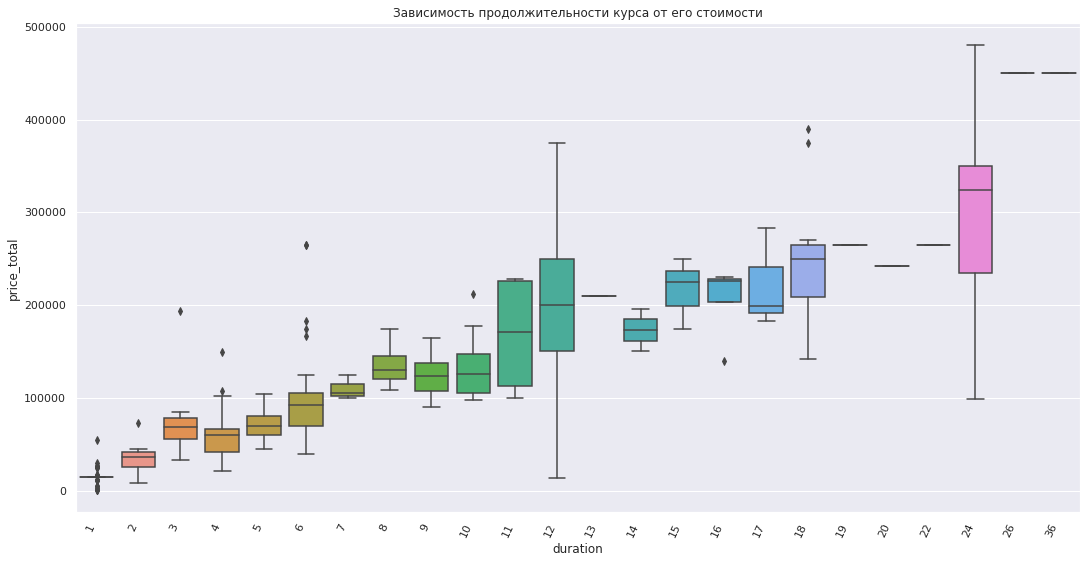

In [ ]:
#Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
from matplotlib import pyplot
sns.boxplot(x='duration', y="price_total", data=dfzero)
plt.xticks(rotation=65, ha = 'right')

sns.set(rc={'figure.figsize':(18,8.27)})
plt.title('Зависимость продолжительности курса от его стоимости')

plt.show()

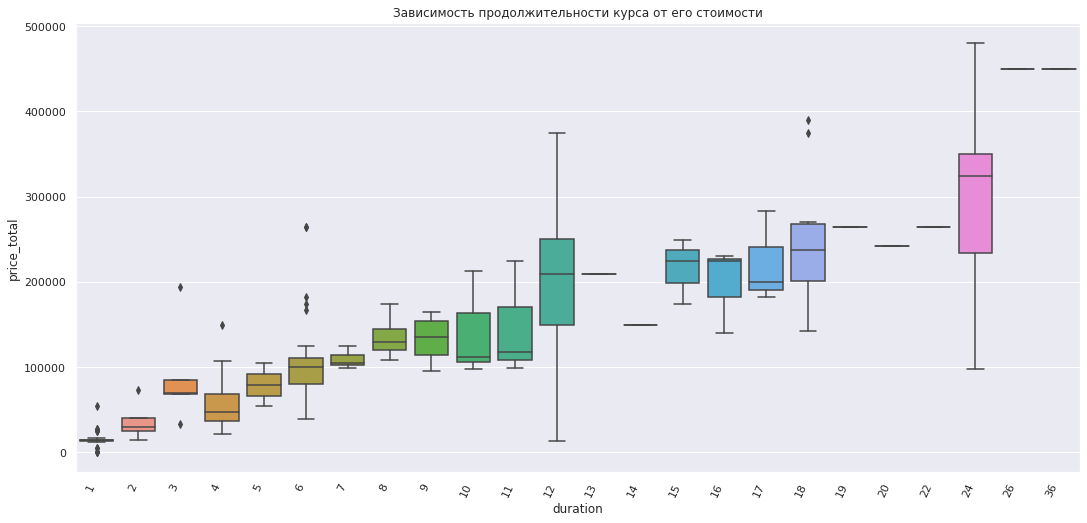

In [ ]:
sns.boxplot(x='duration', y="price_total", data=dftop4)
plt.xticks(rotation=65, ha = 'right')

sns.set(rc={'figure.figsize':(18,9)})
plt.title('Зависимость продолжительности курса от его стоимости')

plt.show()

### Проверка нормальности по критерию Шапиро-Уилка

По обоим параметрам (длительность курса, стоимость курса) значения pvalue меньше 5%, что значит мы не можем принять нулевую гипотезу Но и данные не распределены нормально, принимает альтернативную гипотезу Н1

Далее нужно понять сколь групп и зависисы ли выборки, чтобы определить какой метод расчета использовать

Нужно сделать анализ влияния категориальных признаков. Критерии сравнения групп

In [ ]:
#dfzero['duration'].hist(bins=25)
print('Продолжительность курса критерий Шапиро-Уилка', stats.shapiro(dfzero['duration']))
print('Продолжительность курса коэффициент асимметрии', dfzero['duration'].skew())  
print('Продолжительность курса коэффициент эксцесса', dfzero['duration'].kurtosis()) 


#dfzero['price_total'].hist(bins=25)
print('Стоимость курса критерий Шапиро-Уилка', stats.shapiro(dfzero['price_total']))
print('Стоимость курса коэффициент асимметрии', dfzero['price_total'].skew())  
print('Стоимость курса коэффициент эксцесса', dfzero['price_total'].kurtosis()) 


Продолжительность курса критерий Шапиро-Уилка ShapiroResult(statistic=0.8861674666404724, pvalue=1.4884413409034492e-15)
Продолжительность курса коэффициент асимметрии 0.9712199995254037
Продолжительность курса коэффициент эксцесса 0.5947314321643558
Стоимость курса критерий Шапиро-Уилка ShapiroResult(statistic=0.9206817746162415, pvalue=9.80978102568808e-13)
Стоимость курса коэффициент асимметрии 0.8007626941728087
Стоимость курса коэффициент эксцесса -0.07198682495245112


### Проверка гипотезы Критерий Краскала-Уолиса
Также мы можем сделать больше категорий. Топ-7 компаний GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus.  Видим, что Критерий Краскала-Уолиса pvalue < 5%, что означает, что мы принимаем не можем принять Н0, нулевая гипотеза о том, что наши средние показатели равны, те есть статистически значимые отличия. те между провайдерами GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus отличия в ценовом разбросе существенные. что мы и видим по средним значениям полной стоимости обучения - колеблется от 68  тр до 158 тр, больше чем в 2 раза.     


Средние значения title_provider
GeekBrains         158566.834783
LoftSchool          68258.000000
OTUS                62038.461538
SkillFactory       169680.027027
Skillbox           150732.357143
Нетология          138602.285714
ЯндексПрактикум    115210.526316
Name: price_total, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

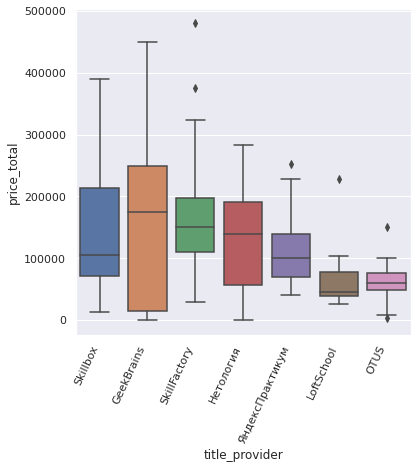

In [ ]:
# b) создадим dataset с топ-7 компаний, выведем по нему среднее, построим box-plot
provaiders = ['Skillbox', 'GeekBrains', 'SkillFactory', 'Нетология', 'ЯндексПрактикум', 'LoftSchool', 'OTUS']
filter = dfzero['title_provider'].isin(provaiders)
dftop7 = dfzero[filter]
dftop7.shape

print('Средние значения', dftop7.groupby('title_provider')['price_total'].mean())
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='title_provider', y='price_total', data=dftop7)
plt.xticks(rotation=65, ha = 'right')

In [ ]:
# b) Статистические критерии для выборки на 7 групп, топ-7 компаний. Критерий Краскала-Уолиса
dfSkillbox = np.array(dfzero[dfzero['title_provider']=='Skillbox']['price_total'])
dfGeekBrains = np.array(dfzero[dfzero['title_provider']=='GeekBrains']['price_total'])
dfSkillFactory = np.array(dfzero[dfzero['title_provider']=='SkillFactory']['price_total']) 
dfНетология = np.array(dfzero[dfzero['title_provider']=='Нетология']['price_total'])   
dfЯндексПрактикум = np.array(dfzero[dfzero['title_provider']=='ЯндексПрактикум']['price_total']) 
dfLoftSchool = np.array(dfzero[dfzero['title_provider']=='LoftSchool']['price_total'])      
dfOTUS = np.array(dfzero[dfzero['title_provider']=='OTUS']['price_total'])   
stats.mstats.kruskalwallis(dfSkillbox, dfGeekBrains, dfSkillFactory, dfНетология, dfЯндексПрактикум, dfLoftSchool, dfOTUS)

KruskalResult(statistic=41.746260141967724, pvalue=2.0635427011897972e-07)

In [ ]:
# b) Статистические критерии для выборки на 3 групп, топ-7 компаний. Критерий Краскала-Уолиса
dfSkillbox = np.array(dfzero[dfzero['title_provider']=='Skillbox']['price_total'])
dfGeekBrains = np.array(dfzero[dfzero['title_provider']=='GeekBrains']['price_total'])
dfSkillFactory = np.array(dfzero[dfzero['title_provider']=='SkillFactory']['price_total']) 
dfНетология = np.array(dfzero[dfzero['title_provider']=='Нетология']['price_total'])   
 
stats.mstats.kruskalwallis(dfSkillbox, dfGeekBrains, dfSkillFactory, dfНетология)

KruskalResult(statistic=1.1718821384172833, pvalue=0.7597557309351672)

### Парная регрессия OLS


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_total   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     857.5
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.25e-96
Time:                        07:25:48   Log-Likelihood:                -4374.8
No. Observations:                 354   AIC:                             8754.
Df Residuals:                     352   BIC:                             8761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.063e+04   4962.990      4.156      0.000    1.09e+04    3.04e+04
duration    1.251e+04    427.338     29.284      0.000    1.17e+04    1.34e+04
==============================================================================
Omnibus:                       32.767   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.702
Skew:                           0.310   Prob(JB):                     3.37e-25
Kurtosis:                       5.694   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

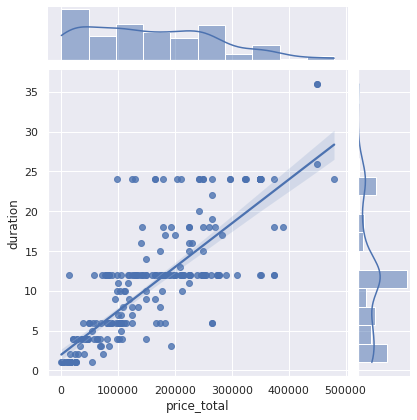

In [ ]:
sns.set(style="darkgrid")
sns.jointplot('price_total', 'duration', data=dftop4, kind="reg")
import statsmodels.api as sm
import statsmodels.formula.api as smf
results1 = smf.ols('price_total ~ duration', data=dfzero).fit()
results1.summary()

### Множественная регрессия OLS
смотрим в первую очередь на pvalue факторов, какие значимые, какие нет в модели 
в нашем случае все параметры значимы. но мы не добавили категориальные факторы, возможно в будущем картина измениться

In [ ]:

resultsm = smf.ols('price_total ~ duration + rating', data=dfzero).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_total   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     510.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.27e-104
Time:                        07:25:49   Log-Likelihood:                -4352.0
No. Observations:                 354   AIC:                             8710.
Df Residuals:                     351   BIC:                             8722.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.52e+05   2.53e+04     -6.011      0.000   -2.02e+05   -1.02e+05
duration    1.005e+04    535.690     18.759      0.000    8995.349    1.11e+04
rating      2.266e+04   3261.856      6.946      0.000    1.62e+04    2.91e+04
==============================================================================
Omnibus:                       33.738   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.194
Skew:                           0.417   Prob(JB):                     5.80e-21
Kurtosis:                       5.371   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ВЫВОДЫ
Длительность обучения связана со стоимостью у выбранных провайдеров GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus
Можно предположить, что более длительные курсы будут стоить дороже, что логично

### Линейная регрессия модель

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
train, test = train_test_split(dfzero, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['duration']], train.price_total)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
pred = lr.predict(test[['duration']])
mean_absolute_error(test.price_total, pred)

#predict на тестовых данных и измерение модели ошибка 2.5 мес ошибка

36759.1600572705

In [ ]:
dfzero['price_total']

0      166750.0
1      193833.0
2      224500.0
3      324000.0
4      130000.0
         ...   
415      8000.0
416     15000.0
417       790.0
418       500.0
419      3000.0
Name: price_total, Length: 354, dtype: float64

## **ГИПОТЕЗА №2: Рейтинг зависит от продолжительности курса** 

---


price_total vs rating

### Структурированные данные для проверки гипотезы 2, Тип данных - количественный

In [ ]:
dfzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 419
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration               354 non-null    int64  
 1   rating                 354 non-null    float64
 2   title_course           354 non-null    object 
 3   title_provider         354 non-null    object 
 4   price_total            354 non-null    float64
 5   price_discount         354 non-null    float64
 6   x0_CodeStar            354 non-null    float64
 7   x0_Cпециалист.ру       354 non-null    float64
 8   x0_FructCode           354 non-null    float64
 9   x0_GeekBrains          354 non-null    float64
 10  x0_HEDU                354 non-null    float64
 11  x0_Hedu                354 non-null    float64
 12  x0_LoftSchool          354 non-null    float64
 13  x0_MDA                 354 non-null    float64
 14  x0_NordicIT            354 non-null    float64
 15  x0_OTU

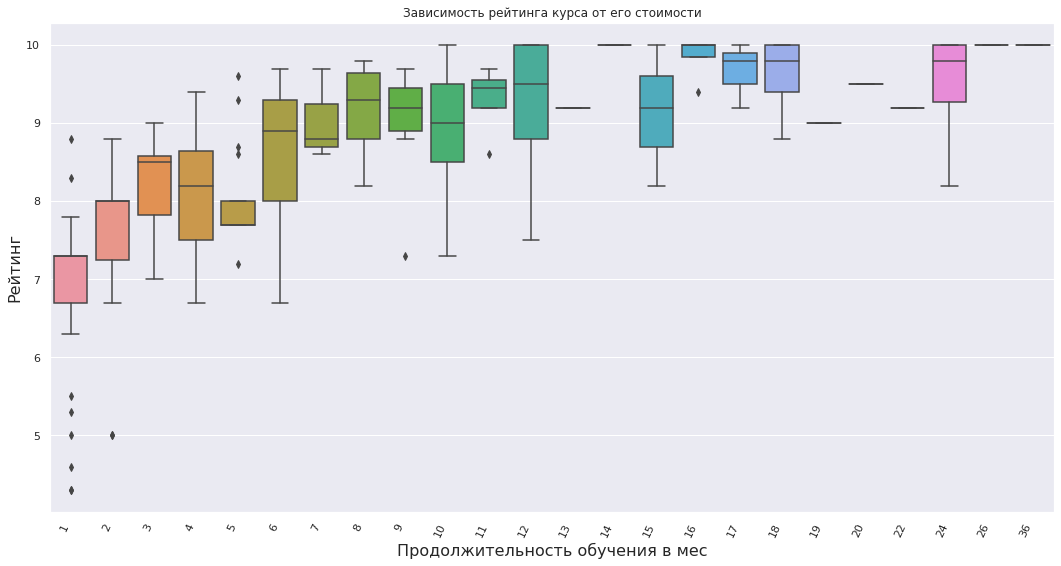

In [ ]:
#Визуализация
import seaborn as sns
sns.boxplot(x='duration', y="rating", data=dfzero)
plt.xticks(rotation=65, ha = 'right')

sns.set(rc={'figure.figsize':(18,14)})
plt.title('Зависимость рейтинга курса от его стоимости')
plt.xlabel('Продолжительность обучения в мес', fontsize=16)
plt.ylabel('Рейтинг', fontsize=16)
plt.show()

### Проверка нормальности по критерию Шапиро-Уилка

По обоим параметрам (рейтинг курса, стоимость курса) значения pvalue меньше 5%, что значит мы не можем принять нулевую гипотезу Но и данные не распределены нормально, принимает альтернативную гипотезу Н1

Далее нужно понять сколь групп и зависисы ли выборки, чтобы определить какой метод расчета использовать

Нужно сделать анализ влияния категориальных признаков. Критерии сравнения групп

In [ ]:
#dfzero['price_total'].hist(bins=25)
print('Стоимость курса критерий Шапиро-Уилка', stats.shapiro(dfzero['price_total']))
print('Стоимость курса коэффициент асимметрии', dfzero['price_total'].skew())  
print('Стоимость курса коэффициент эксцесса', dfzero['price_total'].kurtosis()) 

#dfzero['rating'].hist(bins=25)
print('Продолжительность курса критерий Шапиро-Уилка', stats.shapiro(dfzero['rating']))
print('Продолжительность курса коэффициент асимметрии', dfzero['rating'].skew())  
print('Продолжительность курса коэффициент эксцесса', dfzero['rating'].kurtosis()) 

Стоимость курса критерий Шапиро-Уилка ShapiroResult(statistic=0.9206817746162415, pvalue=9.80978102568808e-13)
Стоимость курса коэффициент асимметрии 0.8007626941728087
Стоимость курса коэффициент эксцесса -0.07198682495245112
Продолжительность курса критерий Шапиро-Уилка ShapiroResult(statistic=0.9177727103233337, pvalue=5.303982079929437e-13)
Продолжительность курса коэффициент асимметрии -0.8525175601921139
Продолжительность курса коэффициент эксцесса 0.8254433453635084


### Проверка гипотезы Критерий Краскала-Уолиса
Проверяем рейтинг в Топ-7 компаний GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus.  Видим, что Критерий Краскала-Уолиса pvalue < 5%, что означает, что мы принимаем не можем принять Н0, нулевая гипотеза о том, что наши средние показатели равны, те есть статистически значимые отличия. те между провайдерами GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus отличия в рейтинге существенные. колебание от 7 до 9.     


In [ ]:
# b) создадим dataset с топ-7 компаний, выведем по нему среднее, построим box-plot
provaiders = ['Skillbox', 'GeekBrains', 'SkillFactory', 'Нетология', 'ЯндексПрактикум', 'LoftSchool', 'OTUS']
filter = dfzero['title_provider'].isin(provaiders)
dftop7 = dfzero[filter]
dftop7.shape

print('Средние значения', dftop7.groupby('title_provider')['rating'].mean())


Средние значения title_provider
GeekBrains         8.775652
LoftSchool         8.375000
OTUS               7.550000
SkillFactory       9.056757
Skillbox           8.891667
Нетология          8.708571
ЯндексПрактикум    8.621053
Name: rating, dtype: float64


In [ ]:
print('Средние значения', dftop7.groupby('title_provider')['duration'].mean())

Средние значения title_provider
GeekBrains         10.086957
LoftSchool          3.250000
OTUS                4.519231
SkillFactory       11.810811
Skillbox           10.761905
Нетология           9.800000
ЯндексПрактикум     8.157895
Name: duration, dtype: float64


In [ ]:
# b) Статистические критерии для выборки на 7 групп, топ-7 компаний. Критерий Краскала-Уолиса
dfSkillbox = np.array(dfzero[dfzero['title_provider']=='Skillbox']['rating'])
dfGeekBrains = np.array(dfzero[dfzero['title_provider']=='GeekBrains']['rating'])
dfSkillFactory = np.array(dfzero[dfzero['title_provider']=='SkillFactory']['rating']) 
dfНетология = np.array(dfzero[dfzero['title_provider']=='Нетология']['rating'])   
dfЯндексПрактикум = np.array(dfzero[dfzero['title_provider']=='ЯндексПрактикум']['rating']) 
dfLoftSchool = np.array(dfzero[dfzero['title_provider']=='LoftSchool']['rating'])      
dfOTUS = np.array(dfzero[dfzero['title_provider']=='OTUS']['rating'])   
stats.mstats.kruskalwallis(dfSkillbox, dfGeekBrains, dfSkillFactory, dfНетология, dfЯндексПрактикум, dfLoftSchool, dfOTUS)

KruskalResult(statistic=53.97483958156923, pvalue=7.463840048217499e-10)

In [ ]:
# b) Статистические критерии для выборки на 3 групп, топ-7 компаний. Критерий Краскала-Уолиса
dfSkillbox = np.array(dfzero[dfzero['title_provider']=='Skillbox']['price_total'])
dfGeekBrains = np.array(dfzero[dfzero['title_provider']=='GeekBrains']['price_total'])
dfSkillFactory = np.array(dfzero[dfzero['title_provider']=='SkillFactory']['price_total']) 
dfНетология = np.array(dfzero[dfzero['title_provider']=='Нетология']['price_total'])
 
stats.mstats.kruskalwallis(dfSkillbox, dfGeekBrains, dfSkillFactory, dfНетология)

KruskalResult(statistic=1.1718821384172833, pvalue=0.7597557309351672)

### Парная регрессия OLS


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     275.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.29e-46
Time:                        19:08:51   Log-Likelihood:                -1090.3
No. Observations:                 354   AIC:                             2185.
Df Residuals:                     352   BIC:                             2192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.5445      2.115    -12.077      0.000     -29.704     -21.384
rating         4.0341      0.243     16.594      0.000       3.556       4.512
==============================================================================
Omnibus:                       70.678   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.654
Skew:                           1.192   Prob(JB):                     2.09e-25
Kurtosis:                       4.421   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

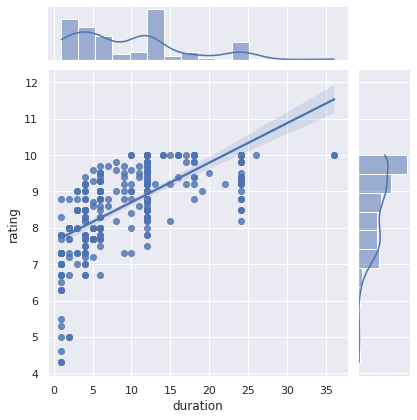

In [ ]:
sns.set(style="darkgrid")
sns.jointplot('duration', 'rating', data=dfzero, kind="reg")
import statsmodels.api as sm
import statsmodels.formula.api as smf
results1 = smf.ols('duration ~ rating', data=dfzero).fit()
results1.summary()

In [ ]:
dfzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration               354 non-null    int64  
 1   rating                 354 non-null    float64
 2   title_course           354 non-null    object 
 3   title_provider         354 non-null    object 
 4   price_total            354 non-null    float64
 5   price_discount         354 non-null    float64
 6   title_provider_counts  354 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 30.2+ KB


### Логистическая регрессия модель

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
x = dftop4.drop(['duration'], axis=1)
y = dftop4.duration

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# импортировать из sklearn логистическую регрессию
logreg = LogisticRegression()

In [ ]:
# инициализация ее с дефолт параметрами
# обучим модель логист регрессии на одной переменной - длительность
train_cols = ['rating', 'price_total']
logreg.fit(train_x[train_cols], train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = logreg.predict(test_x[train_cols])
print(accuracy_score(test_y, pred))
#confusion_matrix(test_y, pred)
logreg.score(train_x[train_cols], train_y)

0.524390243902439


0.5079365079365079

In [ ]:
# в логистической регрессии чаще всего можно получить хорошие результаты, настрив
# параметры регуляризации. она позволяет штрафовать модель за слишком высокие коэфициенты
# это помогает сделать модель более общей и не затачивать модель под тренировочную выборку
# за регуляризацию отвечает параметр penalty, он позволяет попробовать разные методы
# и параметр С, который настраивает мощность регуляризации
logreg_tuned = LogisticRegression(penalty='none', C=0.5)
logreg_tuned.fit(train_x[train_cols], train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.5, penalty='none')

In [ ]:
  pred = logreg_tuned.predict(test_x[train_cols])
print(accuracy_score(test_y, pred))
#confusion_matrix(test_y, pred)
logreg_tuned.score(train_x[train_cols], train_y)

0.524390243902439


0.5132275132275133

### ВЫВОДЫ
Длительность обучения связана с рейтингом по выбранным провайдерам GeekBrains, SKillbox, SkillFactory, Нетология, Яндекс Практикум, Loft School, Otus
Можно предположить, что более длительные курсы имеют более высокий рейтинг

In [ ]:
dfcoursOHE

,duration,rating,title_course,title_provider,price_total,price_discount,x0_GeekBrains,x0_SkillFactory,x0_Skillbox,x0_Нетология
0,12,10.0,Профессия «С#-разработчик»,Skillbox,166750.0,125063.0,0.0,0.0,1.0,0.0
1,18,10.0,Профессия «Разработчик на C++ с нуля»,Skillbox,193833.0,125991.0,0.0,0.0,1.0,0.0
2,15,10.0,Факультет fullstack JavaScript,GeekBrains,224500.0,168750.0,1.0,0.0,0.0,0.0
3,24,10.0,Профессия «Data scientist»,SkillFactory,324000.0,178200.0,0.0,1.0,0.0,0.0
4,12,10.0,Профессия «Системный администратор»,Нетология,130000.0,78000.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
409,1,5.5,Курс «Философия искусственного интеллекта»,Skillbox,54395.0,40796.0,0.0,0.0,1.0,0.0
412,1,5.2,Курс «Веб-разработка на PHP»,GeekBrains,0.0,0.0,1.0,0.0,0.0,0.0
417,1,4.6,Курс «Основы кибербезопасности»,Нетология,790.0,790.0,0.0,0.0,0.0,1.0
418,1,4.3,Курс «Оптимизации запросов MySQL»,GeekBrains,500.0,500.0,1.0,0.0,0.0,0.0


### Нейронка многослойный пресептрон

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
# Модель многослойный персептрон
# Подготовьте данные: удалите колонки, которые косвенно содержат информацию о целевой переменной (odometer/price_std, price_category).
df_neurnet = dfcoursOHE.drop(['title_course', 'title_provider'], axis=1)

In [ ]:
x = df_neurnet.drop(['price_total'], axis=1)
y = df_neurnet.price_total
# инициализация модели по нейронным сетям
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('выборка всего датасет =', len(df_neurnet), '-', 100, '%')
print('тренировочная выборка =', len(x_train), '-', len(x_train)*100/len(df_neurnet), '%')
print('тестова выборка =', len(x_test), '-', len(x_test)*100/len(df_neurnet), '%')

выборка всего датасет = 278 - 100 %
тренировочная выборка = 194 - 69.7841726618705 %
тестова выборка = 84 - 30.215827338129497 %


In [ ]:
#запустим на этих же данных многослойный пресиптрона из from sklearn.neural_network import MLPClassifier
# здесь есть задача как для классификатора так и для регрессии. 
# наша текущая задача - классификатор
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [ ]:
# обучим модель, посчитаем точность 
pred_test_mlp_tuned = mlp.predict(x_test)
pred_train_mlp_tuned = mlp.predict(x_train)
print('точность тестовой выборки =', accuracy_score(y_test, pred_test_mlp_tuned))
print('точность тренировочной выборки =', accuracy_score(y_train, pred_train_mlp_tuned))


точность тестовой выборки = 0.0
точность тренировочной выборки = 0.005154639175257732
